In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [43]:

# URLs of the dataset
train_url = "https://raw.githubusercontent.com/amir188dor/class18_6/main/traintitanic.csv"
test_url = "https://raw.githubusercontent.com/amir188dor/class18_6/main/testtitanic.csv"

# Reading the CSV files from the URLs
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

In [44]:
train_data['Sex']= train_data['Sex'].map({'male':0,'female':1})
test_data['Sex'] =test_data['Sex'].map({'male':0,'female':1})
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

<ipython-input-44-a56b84f69cd5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-44-a56b84f69cd5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


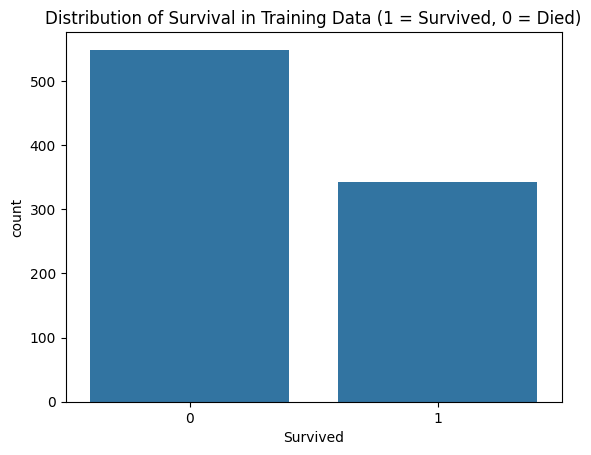

In [45]:
# Displaying the first few rows of the training dataset
print(train_data.head())

# Basic visualization of the training data: distribution of classes
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survival in Training Data (1 = Survived, 0 = Died)')
plt.show()


In [46]:
# Selecting features and target for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

In [47]:
# Creating and training the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicting the test data
predictions = model.predict(X_test)

In [48]:
# Visualizing the predicted data (Note: test dataset usually doesn't have 'Survived' column, shown here for illustration)
if 'Survived' in test_data:
    sns.countplot(x=predictions, data=test_data)
    plt.title('Predicted Survival on Test Data (1 = Survived, 0 = Died)')
    plt.show()

    # Evaluating the model if test data has the 'Survived' column
    print("Classification Report:\n", classification_report(test_data['Survived'], predictions))
    print("Confusion Matrix:\n", confusion_matrix(test_data['Survived'], predictions))

# Showing a few prediction results
predicted_output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
print(predicted_output.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
